# Import

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

##Load dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/project/archive (4)/traffic_Data/Metro_Interstate_Traffic_Volume.csv', parse_dates=['date_time'], index_col='date_time' )

#EDA

In [6]:
df.head()

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2012-10-02 09:00:00     NaN  288.28      0.0      0.0          40   
2012-10-02 10:00:00     NaN  289.36      0.0      0.0          75   
2012-10-02 11:00:00     NaN  289.58      0.0      0.0          90   
2012-10-02 12:00:00     NaN  290.13      0.0      0.0          90   
2012-10-02 13:00:00     NaN  291.14      0.0      0.0          75   

                    weather_main weather_description  traffic_volume  
date_time                                                             
2012-10-02 09:00:00       Clouds    scattered clouds            5545  
2012-10-02 10:00:00       Clouds       broken clouds            4516  
2012-10-02 11:00:00       Clouds     overcast clouds            4767  
2012-10-02 12:00:00       Clouds     overcast clouds            5026  
2012-10-02 13:00:00       Clouds       broken clouds            4918

In [7]:
df.tail()

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2018-09-30 19:00:00     NaN  283.45      0.0      0.0          75   
2018-09-30 20:00:00     NaN  282.76      0.0      0.0          90   
2018-09-30 21:00:00     NaN  282.73      0.0      0.0          90   
2018-09-30 22:00:00     NaN  282.09      0.0      0.0          90   
2018-09-30 23:00:00     NaN  282.12      0.0      0.0          90   

                     weather_main     weather_description  traffic_volume  
date_time                                                                  
2018-09-30 19:00:00        Clouds           broken clouds            3543  
2018-09-30 20:00:00        Clouds         overcast clouds            2781  
2018-09-30 21:00:00  Thunderstorm  proximity thunderstorm            2159  
2018-09-30 22:00:00        Clouds         overcast clouds            1450  
2018-09-30 23:00:00        Clouds         overcast clouds             954

In [8]:
df.shape

(48204, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [10]:
df.duplicated().sum()

29

In [11]:
df.isna().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
traffic_volume             0
dtype: int64

#preprocesing

In [12]:
df['holiday'].value_counts()

holiday
Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
State Fair                   5
Name: count, dtype: int64

In [13]:
df['holiday'].fillna('No', inplace=True)

In [14]:
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df['temp_celsius'] = df['temp'] - 273.15

In [17]:
df.drop('temp', axis=1, inplace=True)

In [18]:
df.head()

holiday  rain_1h  snow_1h  clouds_all weather_main  \
date_time                                                                
2012-10-02 09:00:00      No      0.0      0.0          40       Clouds   
2012-10-02 10:00:00      No      0.0      0.0          75       Clouds   
2012-10-02 11:00:00      No      0.0      0.0          90       Clouds   
2012-10-02 12:00:00      No      0.0      0.0          90       Clouds   
2012-10-02 13:00:00      No      0.0      0.0          75       Clouds   

                    weather_description  traffic_volume  temp_celsius  
date_time                                                              
2012-10-02 09:00:00    scattered clouds            5545         15.13  
2012-10-02 10:00:00       broken clouds            4516         16.21  
2012-10-02 11:00:00     overcast clouds            4767         16.43  
2012-10-02 12:00:00     overcast clouds            5026         16.98  
2012-10-02 13:00:00       broken clouds            4918         17.99

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48175 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48175 non-null  object 
 1   rain_1h              48175 non-null  float64
 2   snow_1h              48175 non-null  float64
 3   clouds_all           48175 non-null  int64  
 4   weather_main         48175 non-null  object 
 5   weather_description  48175 non-null  object 
 6   traffic_volume       48175 non-null  int64  
 7   temp_celsius         48175 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [8]:
# we have three columns have outliers
import plotly.express as px
for col in df.columns:
  fig=px.box(df,y=col)
  fig.show()

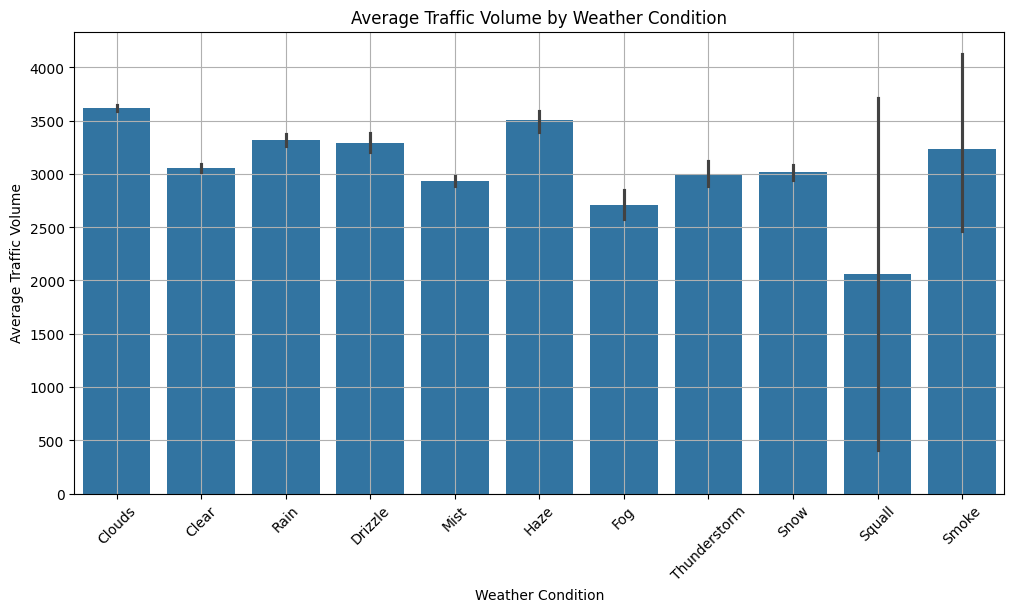

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='weather_main', y='traffic_volume')
plt.title('Average Traffic Volume by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

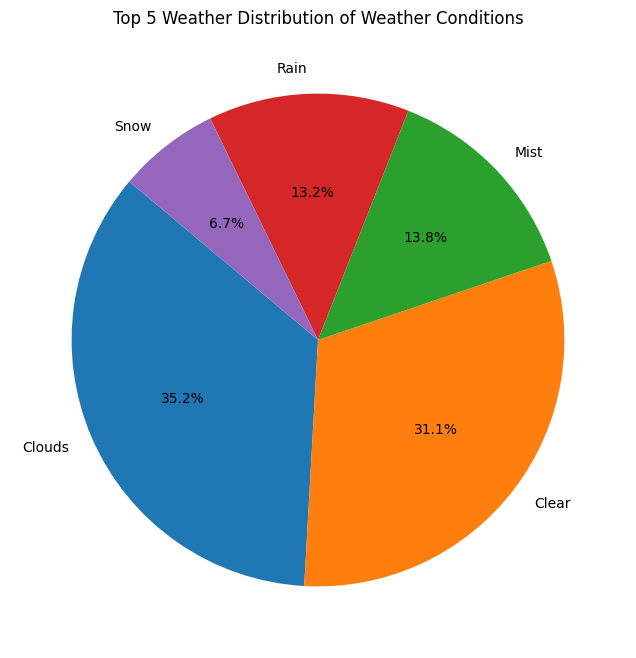

In [23]:
top_5_weather = df['weather_main'].value_counts().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(top_5_weather, labels=top_5_weather.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Weather Distribution of Weather Conditions')
plt.show()

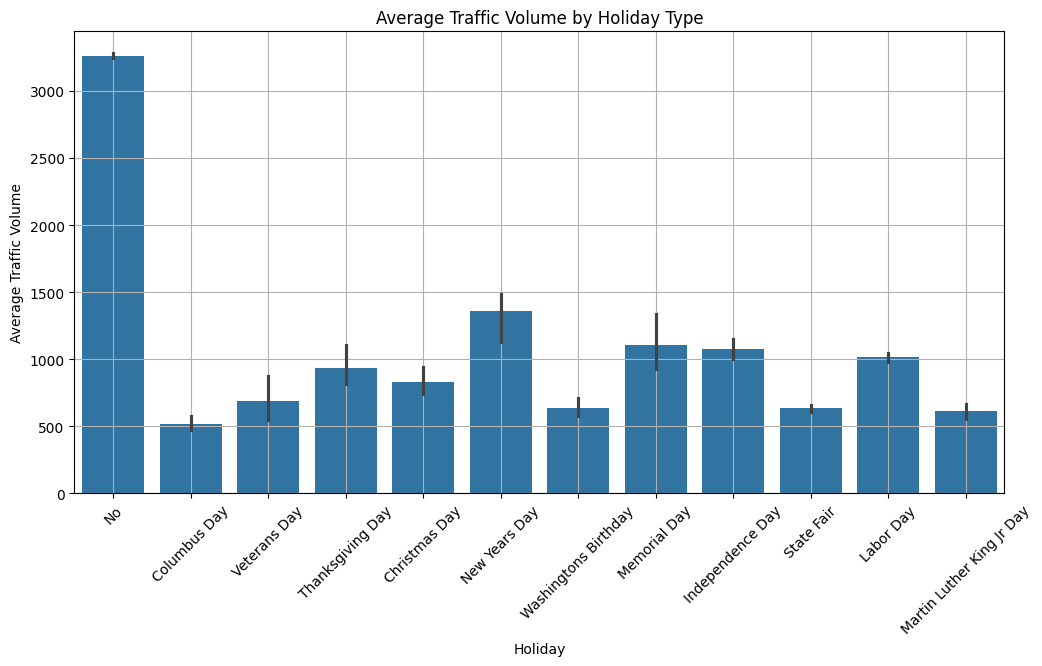

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='holiday', y='traffic_volume')
plt.title('Average Traffic Volume by Holiday Type')
plt.xlabel('Holiday')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

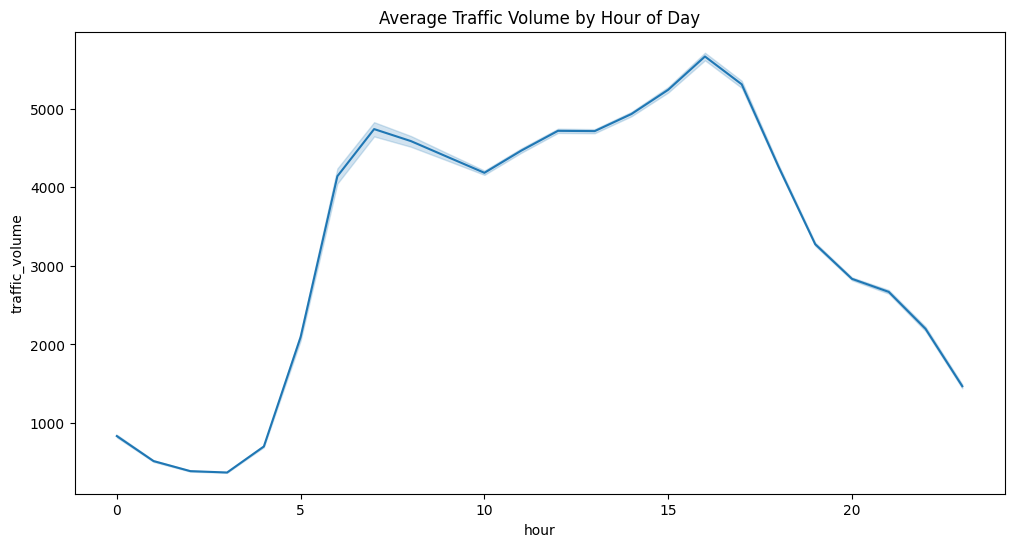

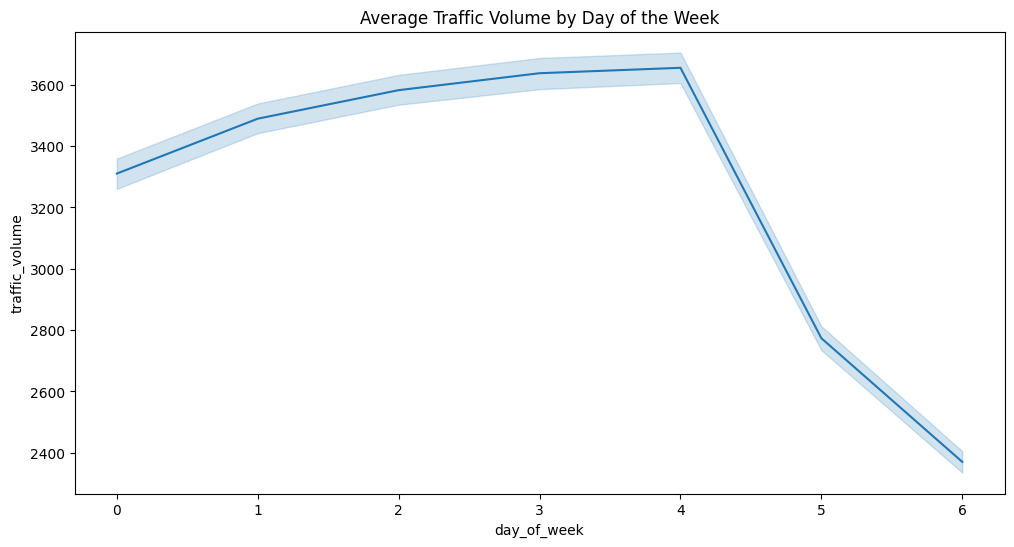

In [26]:
# 3. Exploring Seasonal, Occasional, and Cyclic Trends

# Extracting time-related features
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

# Seasonal Trend: Traffic volume by hour of day
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='traffic_volume')
plt.title('Average Traffic Volume by Hour of Day')
plt.show()

# Seasonal Trend: Traffic volume by day of week
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='day_of_week', y='traffic_volume')
plt.title('Average Traffic Volume by Day of the Week')
plt.show()

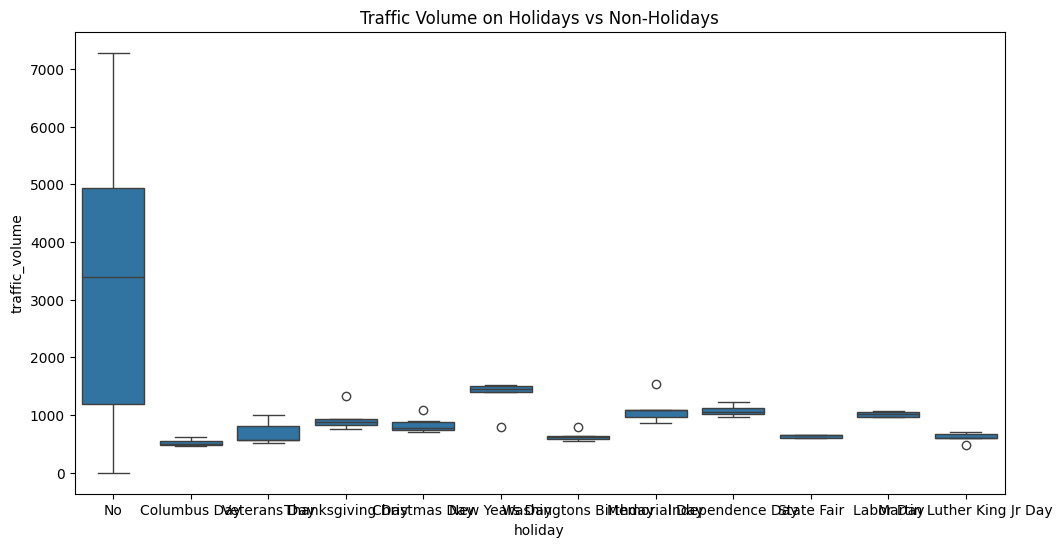

In [27]:
# Occasional Trend: Traffic volume by holiday
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='holiday', y='traffic_volume')
plt.title('Traffic Volume on Holidays vs Non-Holidays')
plt.show()

In [ ]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['holiday', 'weather_main', 'weather_description'])

print(df_encoded)

                     rain_1h  snow_1h  clouds_all  traffic_volume  \
date_time                                                           
2012-10-02 09:00:00      0.0      0.0          40            5545   
2012-10-02 10:00:00      0.0      0.0          75            4516   
2012-10-02 11:00:00      0.0      0.0          90            4767   
2012-10-02 12:00:00      0.0      0.0          90            5026   
2012-10-02 13:00:00      0.0      0.0          75            4918   
...                      ...      ...         ...             ...   
2018-09-30 19:00:00      0.0      0.0          75            3543   
2018-09-30 20:00:00      0.0      0.0          90            2781   
2018-09-30 21:00:00      0.0      0.0          90            2159   
2018-09-30 22:00:00      0.0      0.0          90            1450   
2018-09-30 23:00:00      0.0      0.0          90             954   

                     temp_celsius  holiday_Christmas Day  \
date_time                                 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your one-hot encoded DataFrame

# Calculate correlation matrix
correlation_matrix = df_encoded[['rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume', 'temp_celsius'] +
                                list(df_encoded.columns[df_encoded.columns.str.startswith('holiday_')]) +
                                list(df_encoded.columns[df_encoded.columns.str.startswith('weather_main_')]) +
                                list(df_encoded.columns[df_encoded.columns.str.startswith('weather_description_')])].corr()

# Plot heatmap
plt.figure(figsize=(120, 88))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


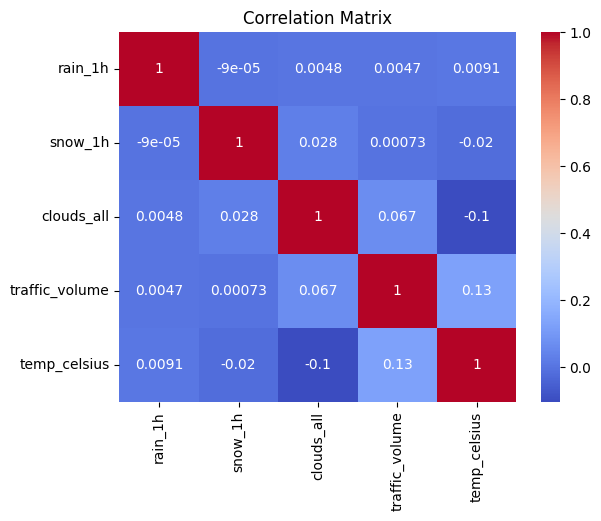

In [ ]:
# Correlation Matrix
correlation_matrix = df[['rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume', 'temp_celsius']].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

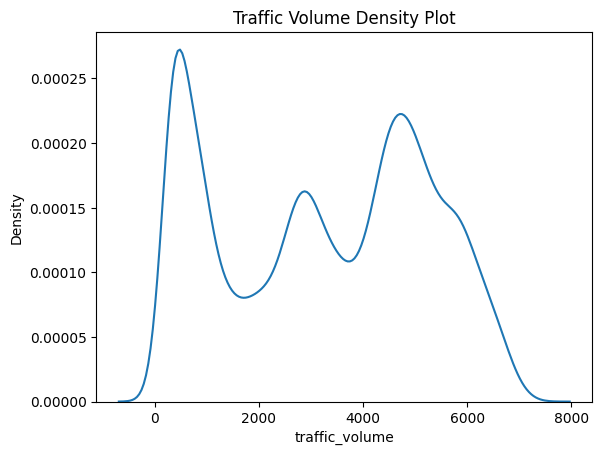

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Density Plot
sns.kdeplot(df['traffic_volume'])
plt.title('Traffic Volume Density Plot')
plt.show()


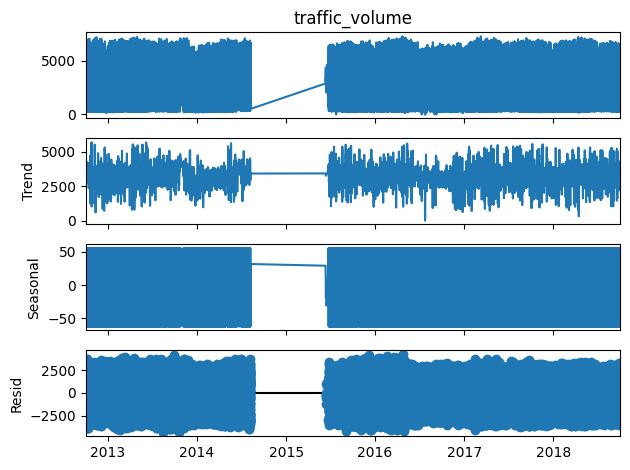

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal Decomposition
result = seasonal_decompose(df['traffic_volume'], model='additive', period=24)
result.plot()
plt.show()


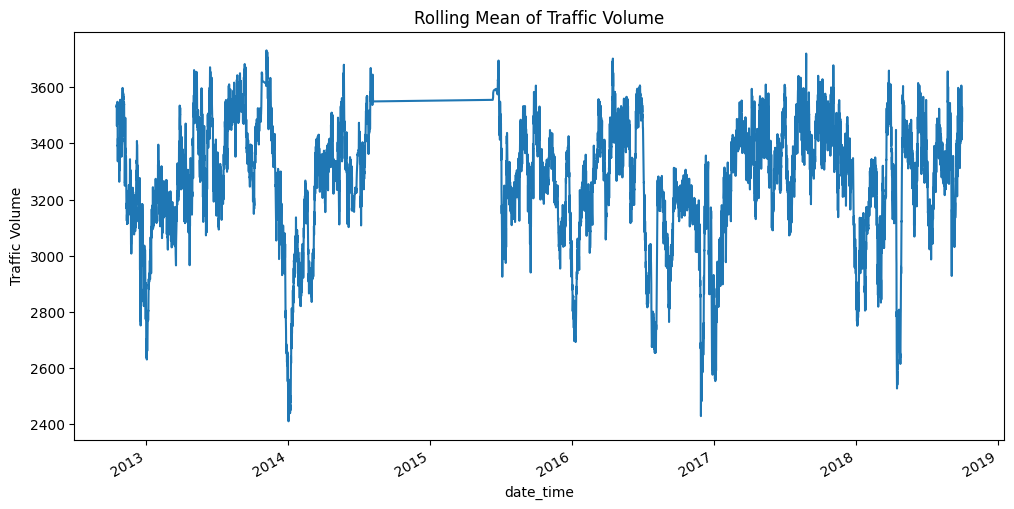

In [ ]:
df['traffic_volume'].rolling(window=365).mean().plot(title='Rolling Mean of Traffic Volume', figsize=(12, 6))
plt.ylabel('Traffic Volume')
plt.show()

In [ ]:
# Filter the DataFrame to include only rows from October 2015 onward

# # Load your dataset
df = pd.read_csv('/content/drive/MyDrive/T5/WEEK_5/min_project_week5/Metro_Interstate_Traffic_Volume.csv')  # Adjust the file path as needed

# # Convert the date column to datetime
df['date_time'] = pd.to_datetime(df['date_time'])  # Replace 'date' with the name of your date column

# # Filter the DataFrame to include only rows from September 2015 onward
filtered_df = df[df['date_time'] >= '2015-09-01']

# # Save the filtered dataset if needed
filtered_df.to_csv('filtered_dataset.csv', index=False)

In [ ]:
df_filter = pd.read_csv('/content/filtered_dataset.csv', parse_dates=['date_time'], index_col='date_time' )

In [ ]:
df_filter.head()

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2015-09-01 00:00:00     NaN  295.86      0.0      0.0          75   
2015-09-01 01:00:00     NaN  295.31      0.0      0.0           1   
2015-09-01 01:00:00     NaN  295.31      0.0      0.0           1   
2015-09-01 04:00:00     NaN  294.35      0.3      0.0          20   
2015-09-01 04:00:00     NaN  294.35      0.3      0.0          20   

                    weather_main weather_description  traffic_volume  
date_time                                                             
2015-09-01 00:00:00         Mist                mist             613  
2015-09-01 01:00:00         Haze                haze             383  
2015-09-01 01:00:00         Mist                mist             383  
2015-09-01 04:00:00         Rain          light rain             888  
2015-09-01 04:00:00         Mist                mist             888

In [ ]:
df_filter.isna().sum()

holiday                30289
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
traffic_volume             0
dtype: int64

In [ ]:
df_filter.duplicated().sum()

24

In [ ]:
df_filter.drop_duplicates(inplace=True)

In [ ]:
df_filter['temp_celsius'] = df_filter['temp'] - 273.15
df_filter.drop('temp', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_main = LabelEncoder()
le_description = LabelEncoder()

df_filter['weather_main_encoded'] = le_main.fit_transform(df_filter['weather_main'])
df_filter['weather_description_encoded'] = le_description.fit_transform(df_filter['weather_description'])

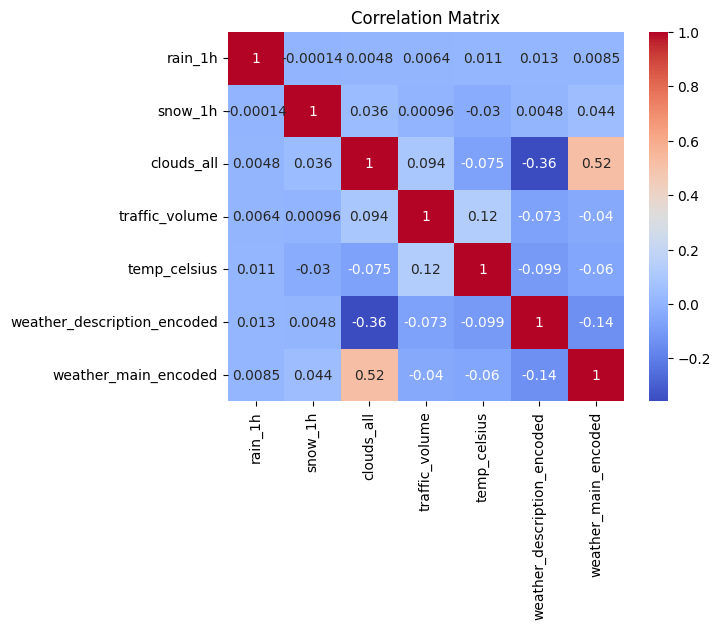

In [ ]:
# Correlation Matrix
correlation_matrix = df_filter[['rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume', 'temp_celsius','weather_description_encoded','weather_main_encoded']].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_filter.head()

holiday  rain_1h  snow_1h  clouds_all weather_main  \
date_time                                                                
2015-09-01 00:00:00     NaN      0.0      0.0          75         Mist   
2015-09-01 01:00:00     NaN      0.0      0.0           1         Haze   
2015-09-01 01:00:00     NaN      0.0      0.0           1         Mist   
2015-09-01 04:00:00     NaN      0.3      0.0          20         Rain   
2015-09-01 04:00:00     NaN      0.3      0.0          20         Mist   

                    weather_description  traffic_volume  temp_celsius  \
date_time                                                               
2015-09-01 00:00:00                mist             613         22.71   
2015-09-01 01:00:00                haze             383         22.16   
2015-09-01 01:00:00                mist             383         22.16   
2015-09-01 04:00:00          light rain             888         21.20   
2015-09-01 04:00:00                mist             888         21.20   

                     weather_main_encoded  weather_description_encoded  
date_time                                                               
2015-09-01 00:00:00                     5                           17  
2015-09-01 01:00:00                     4                            7  
2015-09-01 01:00:00                     5                           17  
2015-09-01 04:00:00                     6                           13  
2015-09-01 04:00:00                     5                           17

In [ ]:
df_filter.columns

Index(['holiday', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'traffic_volume', 'temp_celsius',
       'weather_main_encoded', 'weather_description_encoded'],
      dtype='object')

In [ ]:
df_filter.drop(['holiday', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'weather_main_encoded',
       'weather_description_encoded',], axis=1, inplace=True)

In [ ]:
df_filter.head()

traffic_volume  temp_celsius
date_time                                        
2015-09-01 00:00:00             613         22.71
2015-09-01 01:00:00             383         22.16
2015-09-01 01:00:00             383         22.16
2015-09-01 04:00:00             888         21.20
2015-09-01 04:00:00             888         21.20

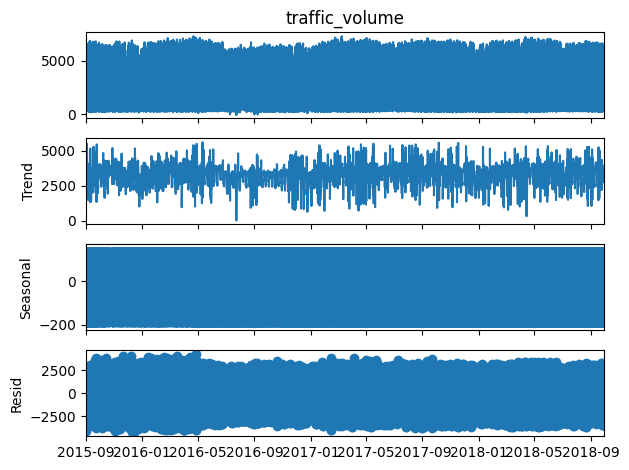

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_filter['traffic_volume'], model='additive', period=24)  # Assuming hourly data with daily seasonality
decomposition.plot()
plt.show()

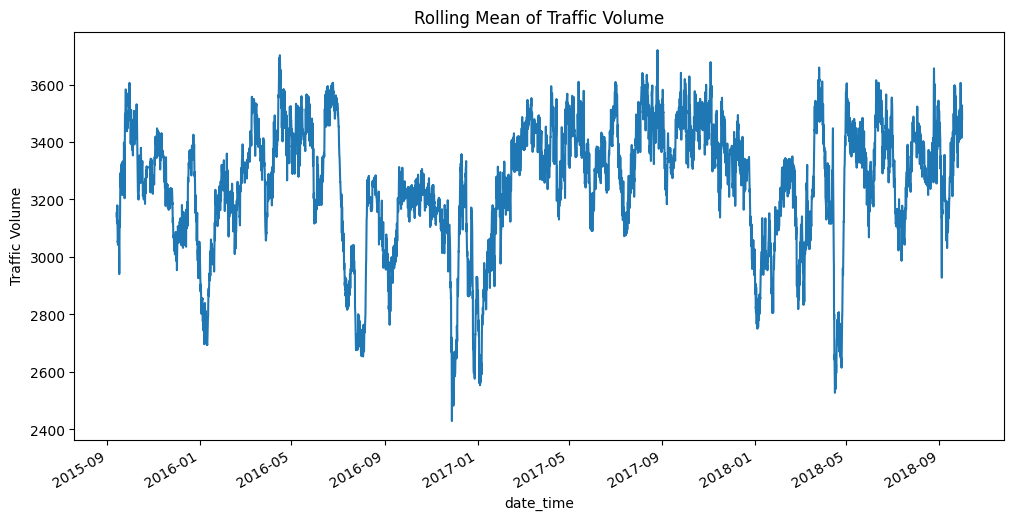

In [ ]:
df_filter['traffic_volume'].rolling(window=365).mean().plot(title='Rolling Mean of Traffic Volume', figsize=(12, 6))
plt.ylabel('Traffic Volume')
plt.show()

In [ ]:
df_multi = df_filter[['traffic_volume','temp_celsius']]

In [ ]:
df_multi

traffic_volume  temp_celsius
date_time                                        
2015-09-01 00:00:00             613         22.71
2015-09-01 01:00:00             383         22.16
2015-09-01 01:00:00             383         22.16
2015-09-01 04:00:00             888         21.20
2015-09-01 04:00:00             888         21.20
...                             ...           ...
2018-09-30 19:00:00            3543         10.30
2018-09-30 20:00:00            2781          9.61
2018-09-30 21:00:00            2159          9.58
2018-09-30 22:00:00            1450          8.94
2018-09-30 23:00:00             954          8.97

[30306 rows x 2 columns]

In [ ]:
trian = df_multi.loc['2015-09-01':'2017-12-31']
val = df_multi.loc['2018-01-01':'2018-7-31']
test = df_multi.loc['2018-7-31':'2018-09-30']

In [ ]:
trian.shape, val.shape, test.shape

((22361, 2), (6065, 2), (1904, 2))

In [ ]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(df_multi, test_size=6065, shuffle=False)
train, val = train_test_split(train_val, test_size=1904, shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [ ]:
scaler = MinMaxScaler()
enc = OneHotEncoder()


imputer = SimpleImputer(strategy='mean')
#pipe = make_pipeline(imputer, scaler)

num_pipe = make_pipeline(imputer, scaler)
cat_pipe = make_pipeline(enc)

preprocessing_pipe = make_column_transformer(
     (num_pipe, ['traffic_volume','temp_celsius'])
     )

preprocessing_pipe

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['traffic_volume', 'temp_celsius'])])

In [ ]:
train_pre = preprocessing_pipe.fit_transform(train)
val_pre = preprocessing_pipe.transform(val)
test_pre = preprocessing_pipe.transform(test)

In [ ]:
from tensorflow.keras.utils import timeseries_dataset_from_array
window_size = 30


train_Xy = timeseries_dataset_from_array(train_pre, targets=train_pre[window_size:, 0], sequence_length=window_size, batch_size=1024)
val_Xy = timeseries_dataset_from_array(val_pre, targets=val_pre[window_size:, 0], sequence_length=window_size, batch_size=1024)
test_Xy = timeseries_dataset_from_array(test_pre, targets=test_pre[window_size:, 0], sequence_length=window_size, batch_size=1024)

In [ ]:
window_size = 30
train_pre[window_size:, 0]

array([0.70412088, 0.70412088, 0.75082418, ..., 0.31195055, 0.32307692,
       0.36813187])

#Model Development and Training

#RNN

In [ ]:
import tensorflow as tf
import numpy as np
import random

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

from tensorflow.keras.layers import Dense, SimpleRNN  # More hiddein layers
from tensorflow.keras.models import Sequential

# Build Arch
model_rnn = Sequential([SimpleRNN(units=32, activation='tanh', return_sequences=True),
                    SimpleRNN(units=64, activation='tanh', return_sequences=True),

                    SimpleRNN(units=128, activation='tanh'),
                   Dense(units=1, activation='relu')])# output

# Compile
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit
history = model_rnn.fit(train_Xy, validation_data=val_Xy, epochs=10, batch_size=1024)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 441ms/step - loss: 0.2723 - mae: 0.4443 - val_loss: 0.2476 - val_mae: 0.4239
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 456ms/step - loss: 0.2723 - mae: 0.4443 - val_loss: 0.2476 - val_mae: 0.4239
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 444ms/step - loss: 0.2723 - mae: 0.4443 - val_loss: 0.2476 - val_mae: 0.4239
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 409ms/step - loss: 0.2723 - mae: 0.4443 - val_loss: 0.2476 - val_mae: 0.4239
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 468ms/step - loss: 0.2723 - mae: 0.4443 - val_loss: 0.2476 - val_mae: 0.4239
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 573ms/step - loss: 0.2723 - mae: 0.4443 - val_loss: 0.2476 - val_mae: 0.4239
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 406ms/step - loss: 0.2723 - mae: 0.4443 - val_loss: 0.2476 - val_mae: 0.4239
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 300ms/step - loss: 0.2723 - mae: 0.4443 - val_loss: 0.2476 - val_mae: 0.4239
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 403ms/ste

In [ ]:
  model_rnn.evaluate(test_Xy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - loss: 0.2851 - mae: 0.4562


[0.2821418046951294, 0.45535042881965637]

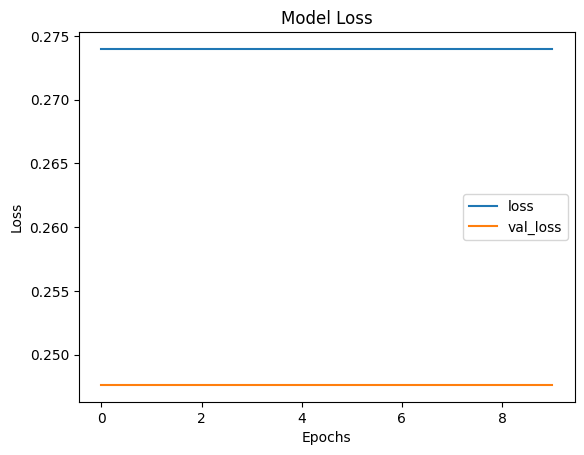

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#LSTM

In [ ]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.models import Sequential

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Build Arch
model_lstm = Sequential([LSTM(units=32, activation='tanh', return_sequences=True),
                    LSTM(units=64, activation='tanh', return_sequences=True),

                    LSTM(units=32, activation='tanh'),
                   Dense(units=1, activation='relu')])# output

# Compile
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit
history = model_lstm.fit(train_Xy, validation_data=val_Xy, epochs=10, batch_size=1024)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 631ms/step - loss: 0.1466 - mae: 0.3121 - val_loss: 0.0747 - val_mae: 0.2399
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 498ms/step - loss: 0.0789 - mae: 0.2467 - val_loss: 0.0686 - val_mae: 0.2293
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 412ms/step - loss: 0.0752 - mae: 0.2407 - val_loss: 0.0626 - val_mae: 0.2167
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 543ms/step - loss: 0.0689 - mae: 0.2278 - val_loss: 0.0457 - val_mae: 0.1752
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 521ms/step - loss: 0.0573 - mae: 0.1961 - val_loss: 0.0406 - val_mae: 0.1628
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 467ms/step - loss: 0.0540 - mae: 0.1873 - val_loss: 0.0380 - val_mae: 0.1604
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 425ms/step - loss: 0.0497 - mae: 0.1764 - val_loss: 0.0337 - val_mae: 0.1508
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 527ms/step - loss: 0.0441 - mae: 0.1639 - val_loss: 0.0269 - val_mae: 0.1324
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 399ms/s

In [ ]:
  model_lstm.evaluate(val_Xy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0260 - mae: 0.1351


[0.026173623278737068, 0.1357094645500183]

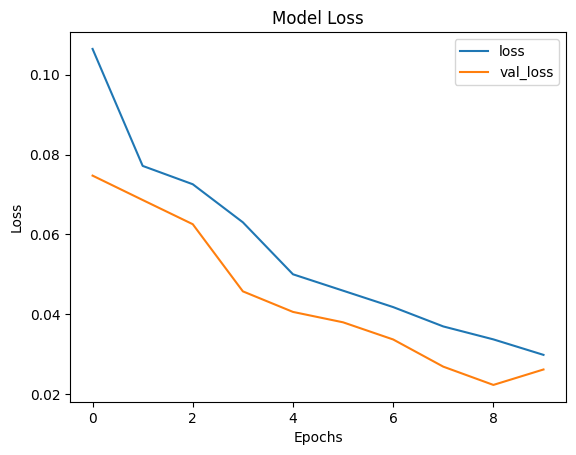

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#GRU

In [ ]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.models import Sequential

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Build Arch
model_gru = Sequential([GRU(units=32, activation='tanh', return_sequences=True),
                    GRU(units=64, activation='tanh', return_sequences=True),

                    GRU(units=128, activation='tanh'),
                   Dense(units=1, activation='relu')])# output

# Compile
model_gru.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit
history = model_gru.fit(train_Xy, validation_data=val_Xy, epochs=10, batch_size=1024)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - loss: 0.1338 - mae: 0.2947 - val_loss: 0.0474 - val_mae: 0.1838
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 931ms/step - loss: 0.0547 - mae: 0.1947 - val_loss: 0.0357 - val_mae: 0.1570
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 932ms/step - loss: 0.0379 - mae: 0.1578 - val_loss: 0.0214 - val_mae: 0.1198
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 938ms/step - loss: 0.0262 - mae: 0.1247 - val_loss: 0.0157 - val_mae: 0.0981
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - loss: 0.0216 - mae: 0.1102 - val_loss: 0.0142 - val_mae: 0.0952
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 938ms/step - loss: 0.0182 - mae: 0.1016 - val_loss: 0.0113 - val_mae: 0.0826
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 926ms/step - loss: 0.0154 - mae: 0.0899 - val_loss: 0.0091 - val_mae: 0.0721
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 991ms/step - loss: 0.0135 - mae: 0.0813 - val_loss: 0.0076 - val_mae: 0.0636
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - lo

In [ ]:
  model_gru.evaluate(val_Xy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - loss: 0.0071 - mae: 0.0598


[0.007047416176646948, 0.05983883887529373]

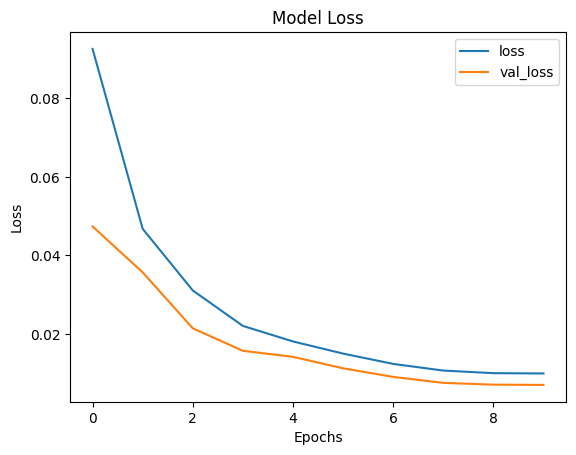

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


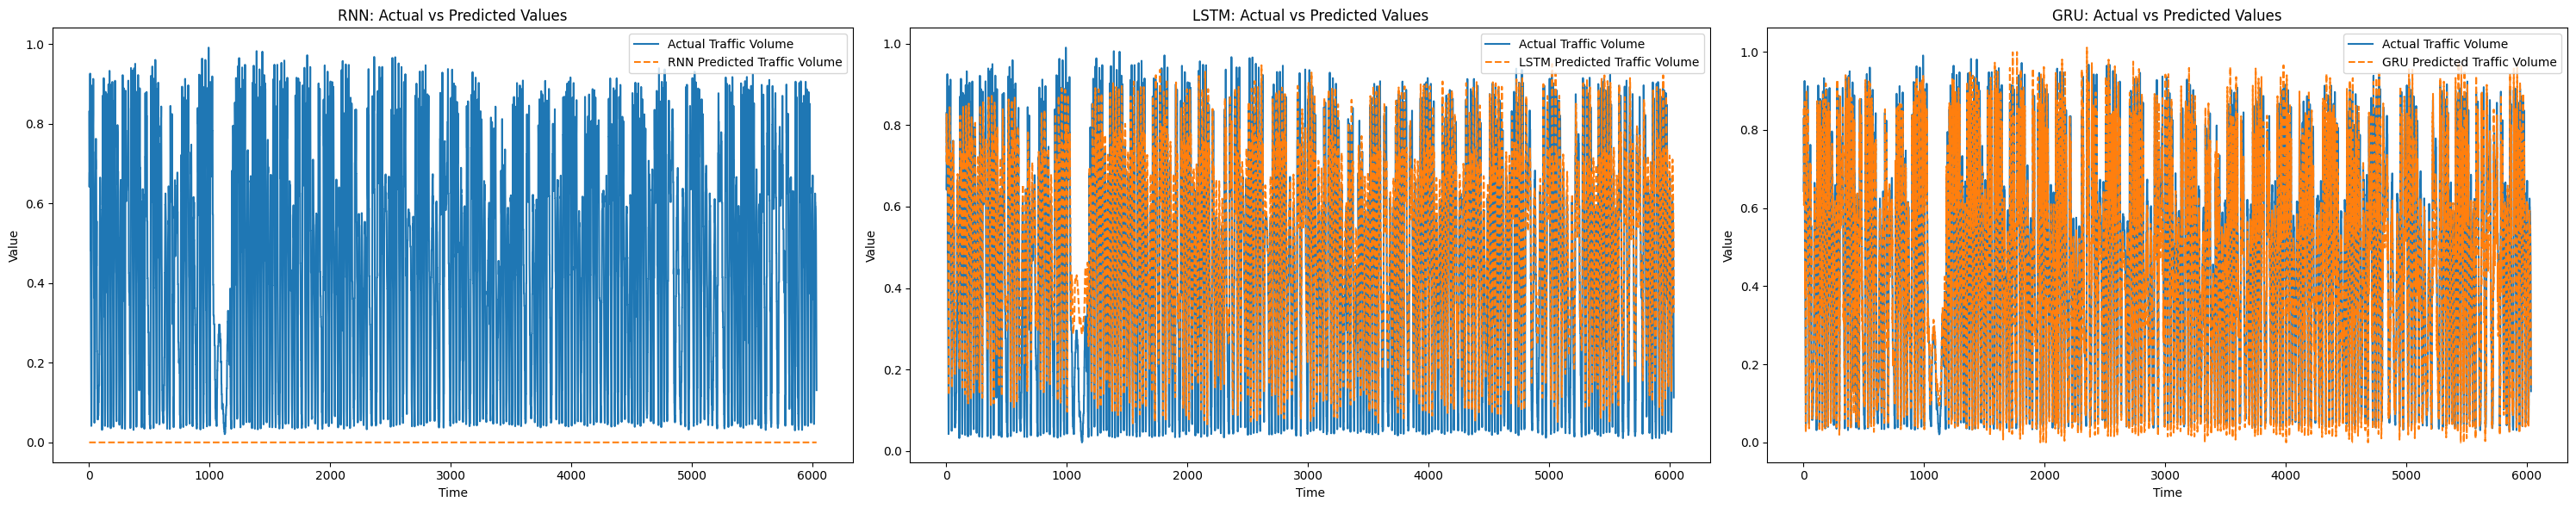

In [ ]:
import numpy as np

# Initialize lists to collect sequences and corresponding targets
test_X = []
test_y = []

# Iterate over the batches in the test_Xy dataset
for batch in test_Xy:
    batch_X, batch_y = batch  # batch_X is (batch_size, sequence_length, num_features)
    test_X.append(batch_X.numpy())  # Keep sequences as they are (no flattening)
    test_y.append(batch_y.numpy())  # Keep targets as they are

# Convert lists to NumPy arrays
test_X = np.concatenate(test_X, axis=0)  # Shape: (num_samples, sequence_length, num_features)
test_y = np.concatenate(test_y, axis=0)  # Shape: (num_samples,)

# Now test_X and test_y can be used for predictions
predictions_rnn = model_rnn.predict(test_X)
predictions_lstm = model_lstm.predict(test_X)
predictions_gru = model_gru.predict(test_X)

# Plot actual vs predicted values for each model
plt.figure(figsize=(30, 6))

plt.subplot(1, 3, 1)
plt.plot(test_y, label='Actual Traffic Volume')
plt.plot(predictions_rnn, label='RNN Predicted Traffic Volume', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('RNN: Actual vs Predicted Values')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(test_y, label='Actual Traffic Volume')
plt.plot(predictions_lstm, label='LSTM Predicted Traffic Volume', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LSTM: Actual vs Predicted Values')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(test_y, label='Actual Traffic Volume')
plt.plot(predictions_gru, label='GRU Predicted Traffic Volume', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('GRU: Actual vs Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()


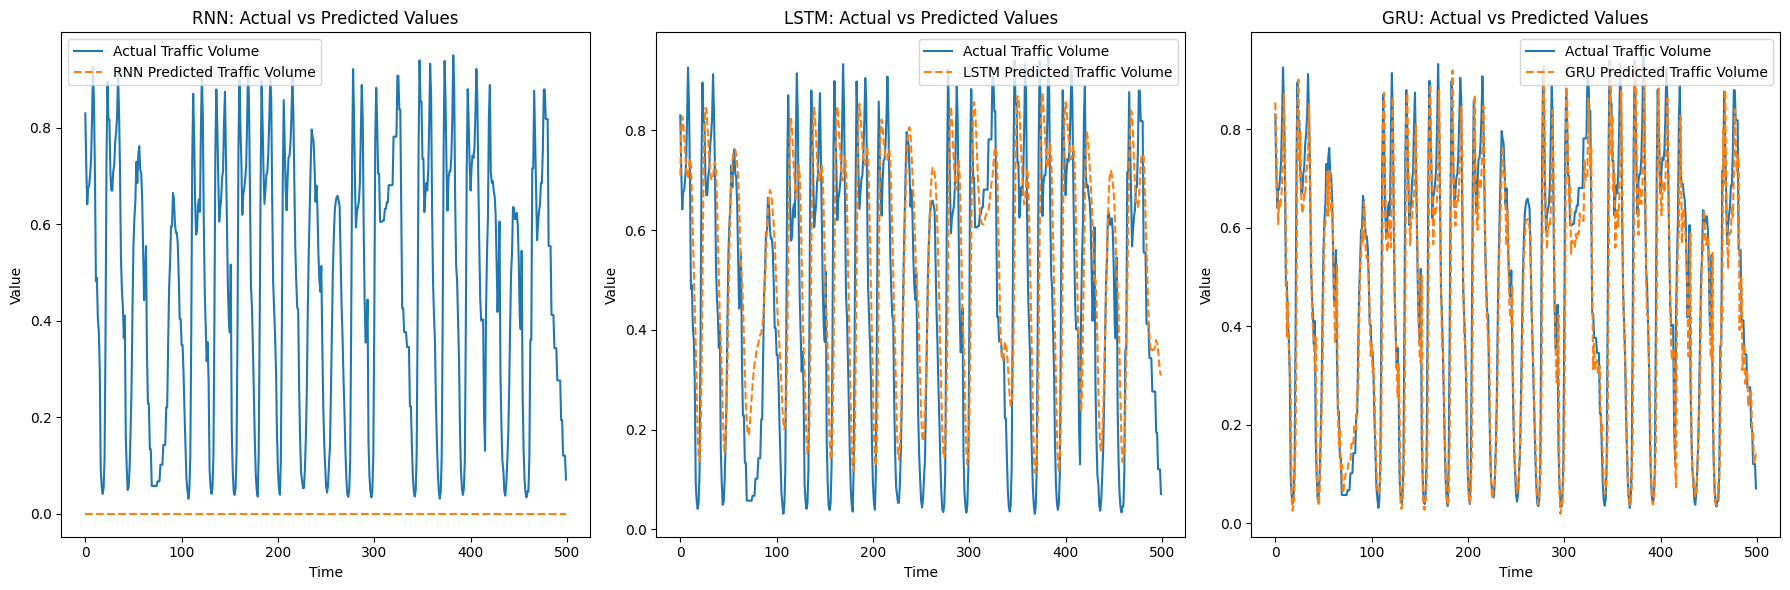

In [ ]:
# Let's say you want to zoom in to the first 500 points
start = 0
end = 500

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(test_y[start:end], label='Actual Traffic Volume')
plt.plot(predictions_rnn[start:end], label='RNN Predicted Traffic Volume', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('RNN: Actual vs Predicted Values')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(test_y[start:end], label='Actual Traffic Volume')
plt.plot(predictions_lstm[start:end], label='LSTM Predicted Traffic Volume', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LSTM: Actual vs Predicted Values')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(test_y[start:end], label='Actual Traffic Volume')
plt.plot(predictions_gru[start:end], label='GRU Predicted Traffic Volume', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('GRU: Actual vs Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print("-" * 30)

# Evaluate each model
evaluate_model(test_y, predictions_rnn, "RNN")
evaluate_model(test_y, predictions_lstm, "LSTM")
evaluate_model(test_y, predictions_gru, "GRU")


RNN Performance:
MAE: 0.46
RMSE: 0.53
R2 Score: -2.77
------------------------------
LSTM Performance:
MAE: 0.12
RMSE: 0.15
R2 Score: 0.71
------------------------------
GRU Performance:
MAE: 0.07
RMSE: 0.09
R2 Score: 0.88
------------------------------


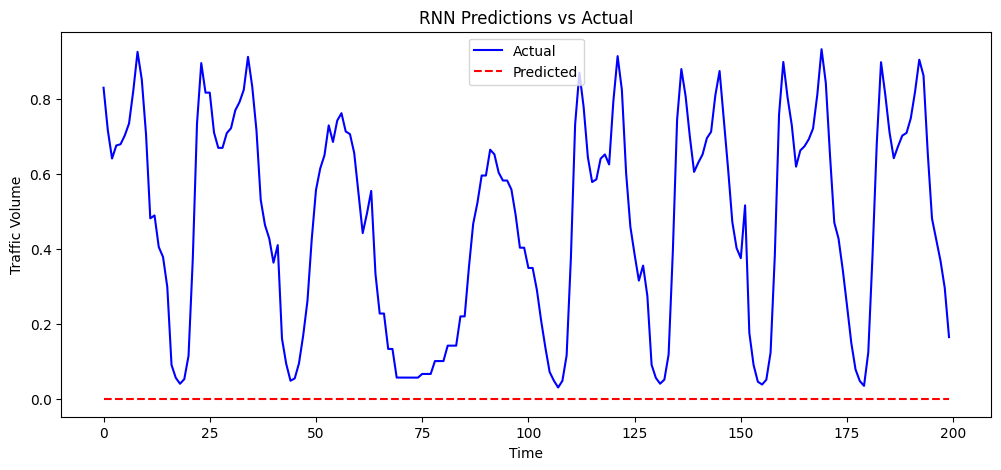

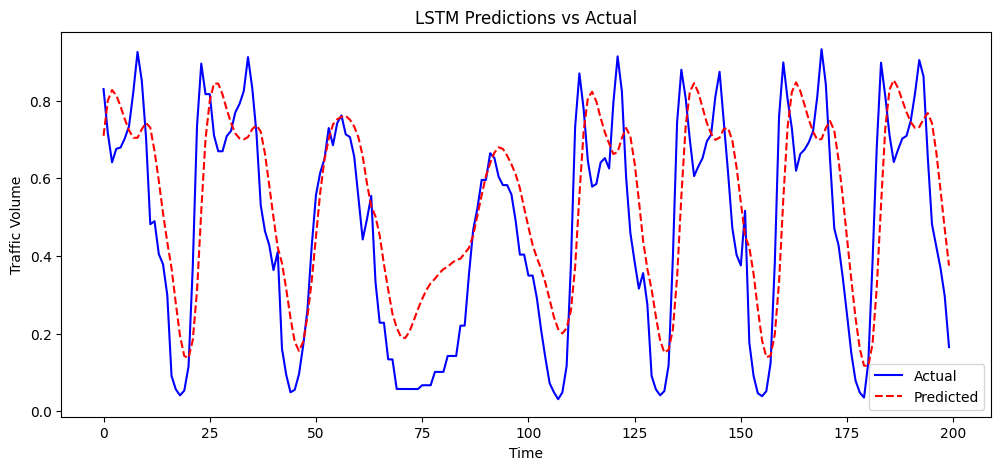

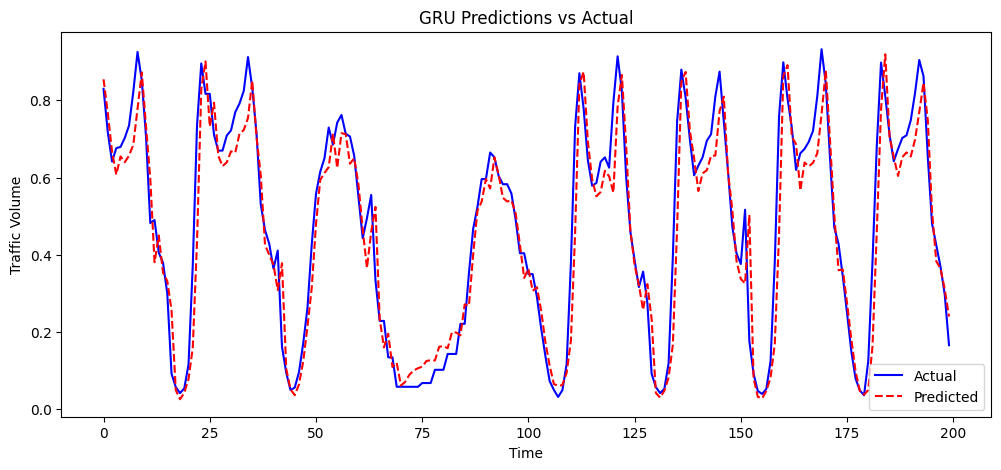

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(y_true, y_pred, model_name, start=0, end=200):
    plt.figure(figsize=(12, 5))
    plt.plot(y_true[start:end], label='Actual', color='blue')
    plt.plot(y_pred[start:end], label='Predicted', color='red', linestyle='--')
    plt.title(f'{model_name} Predictions vs Actual')
    plt.xlabel('Time')
    plt.ylabel('Traffic Volume')
    plt.legend()
    plt.show()

# Plot for each model
plot_predictions(test_y, predictions_rnn, "RNN")
plot_predictions(test_y, predictions_lstm, "LSTM")
plot_predictions(test_y, predictions_gru, "GRU")
